# DrugFlow with Docker for Local Development and Cloud Deployment

---

This documentation provides a guide on DrugFlow implemented in Python, designed for both local development and cloud deployment using Docker. It covers the following topics:

1. **Introduction to DrugFlow**: Overview of the DrugFlow and its applications.
2. **Setting Up the Development Environment**: Step-by-step instructions for setting up a local development environment using Docker.
3. **Building and Running the Docker Container**: Instructions for building the Docker image and running the container.
4. **Deploying to the Cloud**: Guidelines for deploying the DrugFlow to a cloud platform using Docker.
5. **Best Practices**: Tips and best practices for working with DrugFlow and Docker.

Here is a critically expanded and historically grounded version of your notebook introduction for **DrugFlow**, enriched with context, key developments, and clear motivation for diffusion models in drug discovery:


## Introduction to DrugFlow and the Evolution of AI in Drug Discovery

---

The search for new medicines has always been a race against time, complexity, and cost. From the chance discovery of **penicillin** in 1928 to today's **AI-generated molecules**, drug discovery has evolved through multiple revolutions—each catalyzed by breakthroughs in biology, chemistry, and computation.

In recent years, **generative AI** has emerged not just as a tool for prediction, but as a creative partner—capable of designing novel drug-like molecules tailored to specific protein targets. At the forefront of this revolution is **DrugFlow**, an AI framework that integrates **diffusion models** with protein structural data to unlock inverse drug design at unprecedented scale and precision.

### 🧬 Historical Milestones in Drug Discovery

| Era             | Milestone                                       | Impact                                                                                                                                                          |
| --------------- | ----------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **1900s–1970s** | **Serendipity & Pharmacognosy**                 | Drugs like aspirin, morphine, and penicillin were discovered empirically from natural sources. SAR (Structure–Activity Relationship) understanding was minimal. |
| **1980s–1990s** | **Rational Drug Design**                        | Enabled by advances in X-ray crystallography, molecular docking, and enzyme kinetics. Notable examples: HIV protease inhibitors, ACE inhibitors.                |
| **2000s**       | **High-Throughput Screening & Cheminformatics** | Millions of compounds screened using robotic systems. Virtual screening and QSAR modeling matured.                                                              |
| **2010s**       | **Machine Learning Enters**                     | DeepChem, MoleculeNet, and ChemBERTa showed that machine learning could outperform traditional QSAR in property prediction.                                     |
| **2020s**       | **Generative AI & Diffusion Models**            | Inspired by AlphaFold2 and RFdiffusion, AI began to create drug candidates directly from protein structures.                                                    |

### 🔬 The Rise of Generative Models in Drug Design

Generative models have transformed molecular discovery from a **screening problem** into an **inverse design challenge**: instead of searching a vast database, we train models to propose molecules that already fit our criteria.

#### Early Architectures

* **SMILES-based RNNs / VAEs**: Modeled molecules as text strings. While effective, they often generated invalid molecules or ones lacking novelty.
* **Graph Neural Networks (GNNs)**: Treated molecules as graphs, capturing chemical connectivity. JT-VAE and GraphAF offered better scaffold control and validity.

#### Diffusion Models: The Game Changer

Diffusion models—originally developed for image synthesis (e.g., **DDPM**) and later adapted to protein backbone generation (e.g., **RFdiffusion**)—have recently demonstrated **state-of-the-art performance in molecule generation**. They iteratively "denoise" random noise into structured, valid molecules while conditioning on protein features, enabling:

* Precise scaffold placement
* Flexible ligand generation
* Incorporation of 3D geometric and spatial constraints

### 🚀 What is DrugFlow?

**DrugFlow** is an open, modular AI framework for **structure-conditioned molecular generation** using **diffusion-based generative modeling**. It is built for rapid prototyping, scalable training, and cloud-ready deployment. Designed for computational chemists, bioinformaticians, and ML researchers alike, DrugFlow provides:

* 🧠 **Generative Backbones**: Includes graph- and coordinate-based diffusion models
* 🧬 **Protein Context Conditioning**: Accepts 3D binding pockets, AlphaFold2 outputs, or sequence embeddings
* ⚙️ **Training & Inference Pipelines**: Supports mixed-precision training, checkpointing, and evaluation
* ☁️ **Cloud Scalability**: Dockerized environments for seamless transition from local dev to GPU clusters

### 💡 Why DrugFlow?

Unlike classical docking or virtual screening, which evaluate billions of compounds **after** generation, DrugFlow focuses on **generating the right molecules** in the first place—guided by structure, logic, and AI-learned priors. Whether you're targeting kinases, GPCRs, or designing novel scaffolds, DrugFlow empowers you to:

* **Design rather than search**
* **Learn from structure, not just data**
* **Scale effortlessly from laptop to cloud**

In the following sections, we’ll guide you through setting up DrugFlow with Docker, running sample tasks on targets like **GSK3-β**, and extending the system to your own proteins or datasets.

## Notebook Roadmap

---

### Sections
- [Building and Running the Docker Container](#building-and-running-the-docker-container)
- [Using DrugFlow](#using-drugflow)
- [Small GSK3B-FRAT1 Study](#small-gsk3b-frat1-study)
- [Deploying to the Cloud](#deploying-to-the-cloud)


### Prerequisites

Before you begin, ensure you have the following installed on your local machine:

- Docker: [Install Docker](https://docs.docker.com/get-docker/)
- A compatible GPU (for DrugFlow)
- NVIDIA drivers (if using GPU)


## Building and Running the Docker Container

---

To build and run the Docker container for DrugFlow, follow these steps:

1. **Clone the Repository**: Clone the DrugFlow repository to your local machine.

```bash
git clone https://github.com/gabenavarro/MLContainerLab.git
cd MLContainerLab
```

2. **Build the Docker Image**: Use the provided Dockerfile to build the Docker image.

```bash
# You can choose any tag you want for the image
# Feel free to play around with the base image, just make sure the host has the same or higher CUDA version
docker build -f ./assets/build/Dockerfile.drugflow.cu121cp311 -t drugflow:121-311 .
```
3. **Run the Docker Container**: Run the Docker container with the necessary configurations. In the first example, we will run the container locally with GPU support. This is the recommended way to run a container while in development mode. For scaling up, we will use the second example which runs the container in the cloud.

```bash
   # Run the container with GPU support
   docker run -dt \
      --gpus all \
      --shm-size=64g \
      -v "$(pwd)/assets:/workspace/assets" \
      -v "$(pwd)/documentation:/workspace/documentation" \
      -v "$(pwd)/datasets:/workspace/datasets" \
      --name drugflow \
      --env NVIDIA_VISIBLE_DEVICES=all \
      --env GOOGLE_APPLICATION_CREDENTIALS=/workspace/assets/secrets/gcp-key.json \
      --entrypoint /bin/bash \
      drugflow:121-311
   ```
> Note: The `-v "$(pwd):/workspace"` option mounts the current directory to `/workspace` in the container, allowing you to access your local files from within the container. The `--env` options set environment variables for GPU visibility and Google Cloud credentials.<br>
> Note: The `--gpus all` option allows the container to use all available GPUs. <br>

4. **Access the Container with IDE**: In this example, we will use Visual Studio Code to access the container. You can use any IDE of your choice.

```bash
# In a scriptable manner
CONTAINER_NAME=drugflow
FOLDER=/workspace
HEX_CONFIG=$(printf {\"containerName\":\"/$CONTAINER_NAME\"} | od -A n -t x1 | tr -d '[\n\t ]')
code --folder-uri "vscode-remote://attached-container+$HEX_CONFIG$FOLDER"
```

> Note: The `code` command is used to open Visual Studio Code. Make sure you have the Remote - Containers extension installed in VS Code to access the container directly. <br>
> Note: Make sure you have installed Remote - Containers extension in VS Code.<br>


In [2]:
# Example
!python /workspace/src/generate.py \
  --protein /workspace/datasets/boltz2/predict2/boltz_results_boltz2-example/bcl2_target.pdb \
  --ref_ligand /workspace/datasets/boltz2/predict2/boltz_results_boltz2-example/bax_ligand.sdf \
  --checkpoint /models/drugflow/drugflow.ckpt \
  --output /workspace/datasets/boltz2/predict2/boltz_results_boltz2-example/samples.sdf \
  --n_steps 20 \
  --n_samples 50


/miniconda/envs/drugflow/lib/python3.11/site-packages/MDAnalysis/topology/tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)
Marginal Prior MB
Will generate 50 samples
Evaluator [gnina] is not included
Evaluator [interactions] is not included
Will use the following evaluators:
- [representation]
- [mol_props]
- [posebusters]
- [medchem]
- [clashes]
- [geometry]
- [ring_count]
- [energy]
- [chembl_ring_systems]
- [reos]
64it [00:25,  2.52it/s]                                                         


In [ ]:
!python /workspace/src/generate.py \
  --protein /workspace/examples/kras.pdb \
  --ref_ligand /workspace/examples/kras_ref_ligand.sdf \
  --checkpoint /models/drugflow/drugflow.ckpt \
  --output /workspace/examples/samples.sdf \
  --n_steps 20 \
  --n_samples 50


In [4]:
# All Options
!python /workspace/src/generate.py --help

/miniconda/envs/drugflow/lib/python3.11/site-packages/MDAnalysis/topology/tables.py:52: DeprecationWarning: Deprecated in version 2.8.0
MDAnalysis.topology.tables has been moved to MDAnalysis.guesser.tables. This import point will be removed in MDAnalysis version 3.0.0
  warnings.warn(wmsg, category=DeprecationWarning)
usage: generate.py [-h] --protein PROTEIN --ref_ligand REF_LIGAND --checkpoint
                   CHECKPOINT [--molecule_size MOLECULE_SIZE]
                   [--output OUTPUT] [--n_samples N_SAMPLES]
                   [--batch_size BATCH_SIZE]
                   [--pocket_distance_cutoff POCKET_DISTANCE_CUTOFF]
                   [--n_steps N_STEPS] [--device DEVICE] [--datadir DATADIR]
                   [--seed SEED] [--filter] [--metrics_output METRICS_OUTPUT]
                   [--gnina GNINA] [--reduce REDUCE]

options:
  -h, --help            show this help message and exit
  --protein PROTEIN     Input PDB file.
  --ref_ligand REF_LIGAND
                       

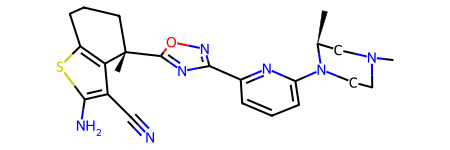

In [ ]:
# Open .sdf file using to see kras reference ligand.
# Reference ligand extracated from pdb file to ensure pocket
# coodinates.
from rdkit.Chem import MolFromMolFile
MolFromMolFile("/workspace/examples/kras_ref_ligand.sdf")

Below is the example of the output generated from DrugFlow generation.

![DrugFlow Example Output](../assets/images/drugflow/state-sweep-example.gif)
